In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Setup

In an alternative reality, the era of continuous trading came to an abrupt end in the early 2010s in the aftermath of the Great Recession, replaced by a single daily auction that redefined global financial markets. The shift was not the product of a single event but rather the culmination of decades of discontent with the trajectory of modern finance. Public sentiment had turned against the financial industry, increasingly viewed as a system that prioritized speed and speculation over substance and societal contribution. Stories of brilliant minds dedicating their careers to shaving microseconds off trade execution times—rather than solving pressing global challenges—fueled a growing belief that finance had become a profound waste of human potential. This narrative gained traction in the public consciousness and became a rallying cry for reform.

Behind the scenes, a quieter but equally consequential shift was taking place. Traditional stock exchanges, long the gatekeepers of market activity, found themselves losing ground to alternative trading venues like dark pools. Nearly half of all trading volume occurred in these opaque, off-exchange platforms, where institutional investors could transact large blocks of shares without moving the market. Frustrated by this erosion of their influence and revenue, exchanges began lobbying regulators for a radical restructuring of the market. Their argument was ostensibly about fairness and transparency, but critics noted that the proposed system of a single daily auction would concentrate trading volume—and fees—back into the exchanges’ hands. This alignment of public frustration and private lobbying created the conditions for sweeping change.

The transition to the single auction system was implemented over a period of five years, during which market participants were forced to adapt to the new paradigm. Each day, orders could be submitted until a predetermined cutoff time, after which prices were set in a centralized auction. Exchanges marketed the system as a triumph of simplicity and fairness, claiming it would eliminate the chaos of continious trading and fragmentation. For the public, the promise of a less frenetic market resonated with a desire to see finance serve the broader economy rather than itself. However, many skeptics saw the reform as a power grab by exchanges, who now controlled the critical moment of price discovery.

As the system took hold, its impact was profound. Liquidity during the rest of the day dried up; the absence of continuous trading reshaped the role of finance professionals, shifting emphasis from speed and execution to analysis and forecasting. While some hailed the changes as a return to fundamentals, others lamented the loss of opportunities for real-time price adjustments. Outside the financial sector, opinions were equally divided. Advocates pointed to the reduction in volatility and the restoration of trust in the markets, arguing that the auction system had lowered the cost of trading since there was no longer a bid-ask spread. Detractors, however, noted that the concentration of trading into a single moment increased systemic risks and sometimes resulted in large price swings. In hindsight, the move to single daily auctions was both a product of its time and a reflection of deeper societal shifts. It addressed many of the immediate concerns around market stability and transparency, yet it left lingering questions about the role of finance in the broader human endeavor. Whether it represented genuine progress or merely a consolidation of power remains a topic of debate among historians and economists.

**Auction Reference Price** 

The auction reference price is the price at which the highest number of buy and sell orders can be matched during an auction, ensuring maximum trade execution. It serves as the clearing price where supply and demand are balanced and is also the price at which market participants can both buy and sell without incurring additional costs. This price is provided to you under the ticker in the auction dataframe. 

**Auction Volume** 

Auction volume measures the total quantity of an asset traded during a specific auction. This data is reported to participants before the auction close, so **you see volume info for the upcoming auction before it finalizes**. This reflects the aggregate demand and supply participating in the auction at a given time. High auction volume typically indicates significant market interest and liquidity, as institutional and retail traders align their trades to the auction, aiming to achieve execution at a fair and representative price.

**Auction Imbalance**

Auction imbalance refers to the difference between the total buy and sell orders submitted for an asset in a scheduled auction, highlighting whether demand or supply dominates. The imbalance data is reported to participants before the auction close, so **you see imbalance info for the upcoming auction before it finalizes**. It serves as an indicator of market sentiment and helps market participants anticipate price movements. A positive imbalance suggests higher buying interest, potentially driving the auction price upward, while a negative imbalance indicates more selling pressure, likely pushing prices lower.

**Market Composite Index (MKT)**

The Market Composite Index (MKT) is a benchmark tracking the performance of a diversified portfolio of stocks across various sectors and market capitalizations. Representing a broad cross-section of the economy, this index includes companies from established industries such as healthcare and finance, as well as dynamic sectors like technology and energy. Designed to reflect the overall health of the equity markets, the MKT Index serves as a critical reference point for both individual investors and institutional funds.

With moderate volatility, the MKT Index provides a balanced view of market trends, blending the stability of blue-chip stocks with the growth potential of emerging companies. Its performance is closely tied to macroeconomic indicators such as GDP, inflation, and interest rates, offering a snapshot of broader market sentiment. Ideal for long-term investors seeking a diversified market benchmark, the MKT Index remains a cornerstone of portfolio construction and performance evaluation.

**Tech Evolution Index (TEC)**

The Tech Evolution Index (TEC) offers concentrated exposure to the high-growth technology sector, encompassing companies leading innovation in software, hardware, semiconductors, and digital services. This index is a barometer for the performance of technology-driven industries, tracking trends in artificial intelligence, cloud computing, and cybersecurity. TEC is widely regarded as an indicator of growth within the global economy's most dynamic sector.

Known for its higher volatility compared to broader indices, the Tech Evolution Index attracts investors seeking to capitalize on technology’s rapid evolution and outsized economic contributions. The index is influenced by tech earnings reports, innovation cycles, and sector-specific developments like regulatory changes or global supply chain dynamics. For those looking to align their portfolios with cutting-edge innovation, TEC provides a focused lens on technology's market potential.

**DataForge Analytics Class A (DATAFO)**

DataForge Analytics Class A (DATAFO) represents the voting shares of DataForge Analytics, a leader in enterprise data solutions, artificial intelligence, and cloud-based services. Designed for investors who value governance participation, DATAFO offers voting rights, allowing shareholders to influence corporate strategies and key decisions. This makes it an attractive option for institutional investors focused on long-term engagement.

DATAFO reflects the company’s growth trajectory as it expands its footprint in enterprise analytics and digital transformation. Performance drivers include earnings results, customer acquisition, and industry partnerships, with external factors like advancements in AI and data privacy regulations adding complexity. With its strong market position and innovative product pipeline, DATAFO is ideal for investors seeking exposure to the data economy’s growing relevance.

**DataForge Analytics Class C (DATAFC)**

DataForge Analytics Class C (DATAFC) provides a non-voting alternative to DataForge's Class A shares, offering investors a cost-effective way to participate in the company’s financial success. While DATAFC lacks governance rights, it is designed for those prioritizing capital appreciation over corporate influence. As such, it sometimes trades at a slight discount to DATAFO but shares the same exposure to the company’s financial performance.

Popular among active traders and passive investors alike, DATAFC combines liquidity with the opportunity to benefit from DataForge’s leadership in AI and data-driven solutions. Its performance mirrors that of DATAFO, driven by earnings growth, product innovation, and market trends in data analytics. For investors seeking affordable access to a tech-forward company poised for long-term growth, DATAFC is an excellent choice.

# Data analysis and algorithm

In [3]:
# auction_prices.csv will be provided on day two of the competition. The following year of auction data will be used for testing.
auction_prices = pd.read_csv('auction_prices.csv')

In [4]:
auction_prices.head()

,Date,TEC,MKT,DATAFC,DATAFO,TEC_VOLUME,MKT_VOLUME,DATAFC_VOLUME,DATAFO_VOLUME,MKT_IMBALANCE,TEC_IMBALANCE,DATAFO_IMBALANCE,DATAFC_IMBALANCE
0,2024-01-03,548.29,633.26,28.61,28.51,27197400,96582300,89610300,90036218,-32638.0,-1653817.0,-479551.0,-482876.0
1,2024-01-04,546.47,633.68,28.75,28.33,23674700,90683400,83296620,83692529,8961901.0,832427.0,72074.0,-1425029.0
2,2024-01-05,548.23,635.40,28.21,28.03,38008900,102026400,85654260,86061375,-5676197.0,-1017302.0,291916.0,629758.0
3,2024-01-08,540.13,626.95,28.24,28.21,48842300,149892000,96659244,97118665,-2958468.0,2150464.0,524343.0,-1174935.0
4,2024-01-09,550.43,633.78,28.41,28.08,37178900,105016100,99204696,99676216,1565000.0,-708564.0,620513.0,1852407.0


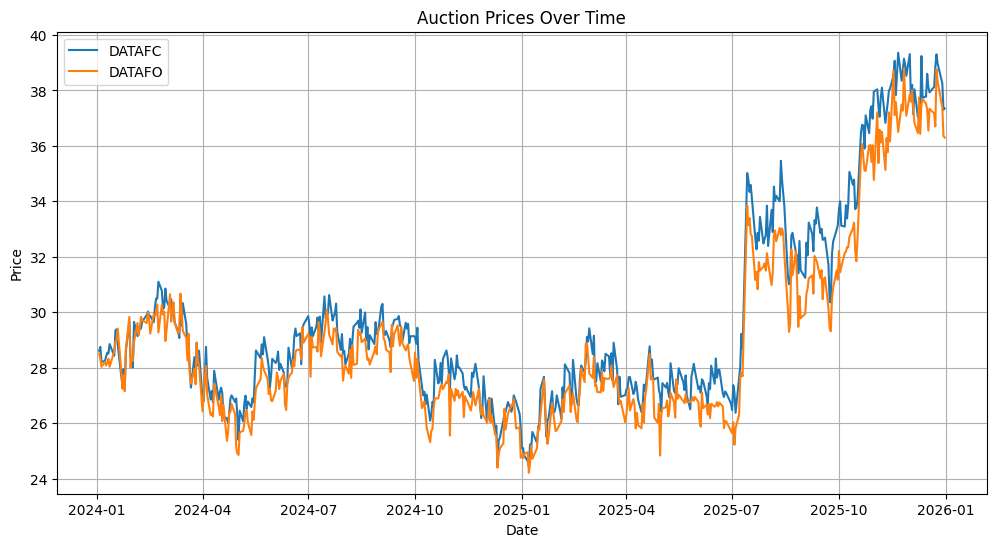

In [5]:
# Convert the 'Date' column to datetime for proper plotting
auction_prices['Date'] = pd.to_datetime(auction_prices['Date'])

# Plot the price columns over time
plt.figure(figsize=(12, 6))
#plt.plot(auction_prices['Date'], auction_prices['TEC'], label='TEC')
#plt.plot(auction_prices['Date'], auction_prices['MKT'], label='MKT')
plt.plot(auction_prices['Date'], auction_prices['DATAFC'], label='DATAFC')
plt.plot(auction_prices['Date'], auction_prices['DATAFO'], label='DATAFO')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Auction Prices Over Time')
plt.legend()
plt.grid()
plt.show()

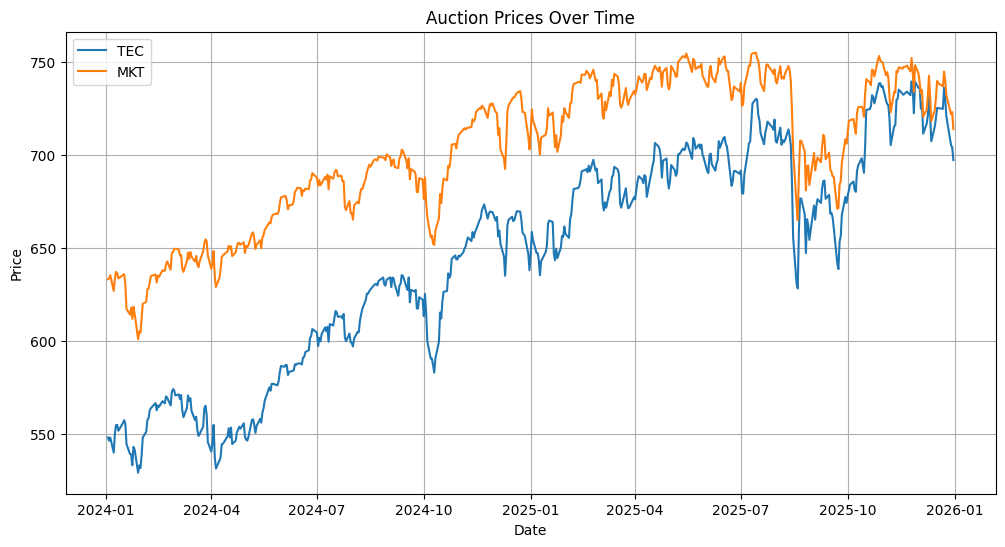

In [6]:
# Plot the price columns over time
plt.figure(figsize=(12, 6))
plt.plot(auction_prices['Date'], auction_prices['TEC'], label='TEC')
plt.plot(auction_prices['Date'], auction_prices['MKT'], label='MKT')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Auction Prices Over Time')
plt.legend()
plt.grid()
plt.show()

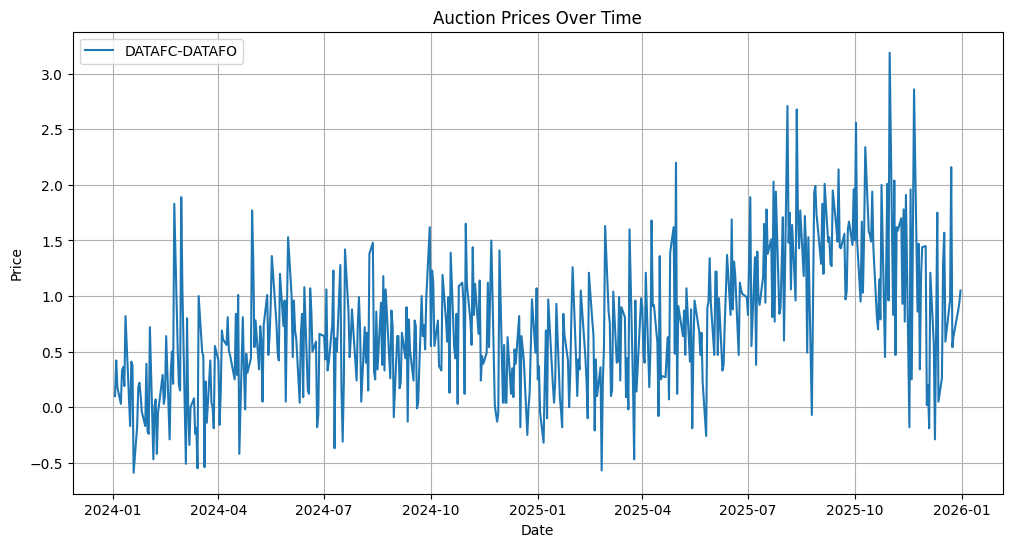

In [7]:
# Plot the price columns over time
plt.figure(figsize=(12, 6))
#plt.plot(auction_prices['Date'], auction_prices['MKT']-auction_prices['TEC'], label='MKT-TEC')
plt.plot(auction_prices['Date'],  auction_prices['DATAFC']-auction_prices['DATAFO'], label='DATAFC-DATAFO')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Auction Prices Over Time')
plt.legend()
plt.grid()
plt.show()

# Submission & Grading

The criteria for grading the competition—based on CAGR and Sharpe ratio—naturally extend into two fundamental concepts in finance: portfolio optimization and optimal leverage. These concepts are deeply intertwined with the metrics used and encourage contestants to think about broader principles beyond simple return maximization (which is still important).

**Portfolio Optimization (Markowitz Framework)**
The use of the Sharpe ratio as a grading metric directly connects to the principles of portfolio optimization, as introduced by Harry Markowitz. In this framework, the goal is to construct a portfolio that maximizes return for a given level of risk or minimizes risk for a given level of return. Contestants are implicitly incentivized to consider not only the predictive accuracy of their strategies but also how their allocations manage risk across the portfolio. For instance, while a highly concentrated allocation might yield a high return, it could expose the portfolio to extreme volatility, reducing the Sharpe ratio. By balancing allocations between assets like SPY, QQQ, DATAFC, and DATAFO—and even the cash component—participants are effectively engaging in a simplified form of Markowitz optimization, seeking to allocate weights in a way that optimally balances risk and reward.

**Optimal Leverage (Kelly Criterion)**
The inclusion of CAGR as a grading criterion introduces the concept of optimal leverage, as informed by the Kelly Criterion. CAGR measures the long-term growth rate of the portfolio, reflecting the compounding effect of returns over time. To maximize CAGR, contestants must carefully consider the level of leverage in their strategies. While higher leverage can amplify returns, it also increases volatility and the risk of drawdowns, which can severely impact the compounding process. The Kelly Criterion provides a theoretical framework for determining the optimal leverage that maximizes long-term growth while avoiding overexposure to risk. Contestants who understand and apply this principle can find the balance between aggressive and conservative leverage, ensuring their strategies are sustainable over the long run.

**Grading for the case** will be based on two key metrics: **compound annual growth rate (CAGR) and Sharpe ratio over one year of out-of-sample (OOS) data.** CAGR evaluates the absolute monetary performance of the strategy, reflecting its ability to maximize returns. The Sharpe ratio measures risk-adjusted returns, highlighting strategies that effectively balance profitability with volatility. While these metrics emphasize different aspects of performance, it is possible for a strategy to excel in all both by achieving high returns with consistent risk management and sustainable growth. Participants are encouraged to design robust strategies that optimize across these dimensions for a comprehensive evaluation.

Your final score in the data science case will be determined by the sum of your placements between CAGR rankings and Sharpe ratio rankings. For example, if your team places 7th in CAGR and 2nd in Sharpe Ratio out of the 35 teams, your score will be 9. Lowest score wins.

You will submit your trading strategy as a python file. Trying to gain an unfair advantage with outside data will result in immediate disqualification.

### Evaluation Function

The code below implements a grading function designed to evaluate trading algorithms based on historical data without allowing any "look-ahead bias." Each day, the algorithm is provided with only the data available up to that point, ensuring fairness and adherence to real-world constraints. The function validates the contestant’s allocations against several rules: **allocations must sum to 1.0 and the sum of absolute values of positions cannot exceed 3 (to limit leverage).** It then calculates daily returns based on the provided weights and updates the portfolio's value. The key performance metrics final portfolio value and Sharpe ratio are computed to measure the effectiveness of the strategy. This same function will be applied to one year of out-of-sample (OOS) data to evaluate the robustness of the submitted algorithms under unseen market conditions. Please make sure that your submitted algorithm handles edge cases, such as the presence of only a single row at the beginning of the dataset. **Contestants are strongly encouraged to thoroughly test their code for bugs or violations of the constraints**, as submissions that fail to run correctly or violate the rules will be disqualified to ensure fairness for all participants.

In [18]:
def example_strategy(historical_df):
    """
    Dummy strategy:
    Returns equal weights (20% each) every day, including 'CASH'.
    [w_TEC, w_MKT, w_DATAFC, w_DATAFO, w_CASH]
    """

    w_TEC  = 0.0
    w_MKT  = 0.0
    
    # If we have fewer than 51 rows, we can't do a 50-day EMA reliably (or even compare day-1 to day-50).
    # We'll default to all-cash or some fallback if insufficient data.
    if len(historical_df) < 21:
        # Go all in cash, or do some simple fallback position
        return np.array([2.0, -1.0, 0.0, 0.0, 0.0])
    
    # We assume historical_df has columns 'DATAFC' and 'DATAFO'.
    # 1) Compute ratio across entire history
    df = historical_df[['DATAFC', 'DATAFO']].copy()
    df['ratio'] = df['DATAFC'] / df['DATAFO']
    
    # 2) Compute a 50-day EMA of the ratio
    #    We'll use pandas' ewm with span=50
    df['ratio_ema50'] = df['ratio'].ewm(span=20).mean()
    
    # Grab the most recent row (today)
    ratio_today = df['ratio'].iloc[-1]
    ema50_today = df['ratio_ema50'].iloc[-1]
    
    # Let's define a threshold (e.g. 0.5% = 0.005).
    # If the difference is smaller than ±0.5%, we consider them "fairly priced" and do something neutral.
    threshold = 0.00005
    diff = ratio_today - ema50_today
    
    # We'll define "significantly above" if diff > +0.5%, 
    # and "significantly below" if diff < -0.5%.
    w_DATAFC = 0.0
    w_DATAFO = 0.0
    w_CASH   = 0.0
    
    if diff > threshold:
        # ratio > EMA => DATAFC is expensive vs. DATAFO => short DATAFC, long DATAFO
        # We'll do a net sum of 1.0, e.g. [-0.25, +1.25]
        w_DATAFC = -1
        w_DATAFO = 2
        w_CASH   = 0.0  # no cash
    elif diff < -threshold:
        # ratio < EMA => DATAFC is cheap vs. DATAFO => long DATAFC, short DATAFO
        # We'll do a net sum of 1.0, e.g. [+1.25, -0.25]
        w_DATAFC = 2
        w_DATAFO = -1
        w_CASH   = 0.0
    else:
        # When the ratio is neutral, incorporate market sentiment via imbalance.
        # Get the most recent imbalances for MKT and TEC.
        imb_MKT = historical_df.iloc[-1]['MKT_IMBALANCE']
        imb_TEC = historical_df.iloc[-1]['TEC_IMBALANCE']
        
        # Both signals positive: go long on both, allocating more to the higher imbalance.
        if imb_MKT > 0 and imb_TEC > 0:
            total_long = 2.0  # total long allocation on MKT and TEC
            # Proportional fractions
            frac_MKT = imb_MKT / (imb_MKT + imb_TEC)
            frac_TEC = imb_TEC / (imb_MKT + imb_TEC)
            w_MKT = total_long * frac_MKT
            w_TEC = total_long * frac_TEC
            w_CASH = 1 - (w_MKT + w_TEC)  # should equal -1
        # Both signals negative: take short positions and hold cash to offset.
        elif imb_MKT < 0 and imb_TEC < 0:
            total_short = 1.0  # total short allocation (kept smaller to respect leverage)
            frac_MKT = abs(imb_MKT) / (abs(imb_MKT) + abs(imb_TEC))
            frac_TEC = abs(imb_TEC) / (abs(imb_MKT) + abs(imb_TEC))
            w_MKT = - total_short * frac_MKT
            w_TEC = - total_short * frac_TEC
            w_CASH = 1 - (w_MKT + w_TEC)  # here, w_MKT+w_TEC = -1, so w_CASH becomes 2.
        elif imb_MKT > 0 and imb_TEC < 0:
            # Mixed signals: MKT is long, TEC is short.
            w_MKT = 1.0
            w_TEC = -1.0
            w_CASH = 1.0
        elif imb_MKT < 0 and imb_TEC > 0:
            # Mixed signals: MKT is short, TEC is long.
            w_MKT = -1.0
            w_TEC = 1.0
            w_CASH = 1.0
        else:
            # No clear signals: go all cash.
            w_MKT = 0.0
            w_TEC = 0.0
            w_CASH = 1.0

    w = np.array([w_TEC, w_MKT, w_DATAFC, w_DATAFO, w_CASH])
    return w



def grade_submission(strategy_func, df, risk_free_rate=0.045):
    """
    Evaluate a strategy by simulating over daily data (no look-ahead),
    computing final portfolio value, CAGR, and Sharpe ratio.

    Each day, we call `strategy_func(historical_df_up_to_today)`
    so that the contestant can produce a separate allocation for that day.

    Constraints:
    1. Allocations must sum up to 1
    2. The sum of absolute values of positions cannot exceed 3.

    Parameters
    ----------
    strategy_func : function
        A function that takes a partial (historical) DataFrame:
          df.iloc[:i+1], and returns an allocation array/list of 5 floats:
          [w_TEC, w_MKT, w_DATAFC, w_DATAFO, w_CASH]

    df : pd.DataFrame
        Contains daily data sorted by 'Date' with columns:
        [
          'Date', 'TEC', 'MKT', 'DATAFC', 'DATAFO',
          'TEC_VOLUME', 'MKT_VOLUME', 'DATAFC_VOLUME', 'DATAFO_VOLUME',
          'MKT_IMBALANCE', 'TEC_IMBALANCE', 'DATAFO_IMBALANCE', 'DATAFC_IMBALANCE'
        ]

    risk_free_rate : float, optional
        Risk-free rate per year (e.g. 0.02 for 2%). Defaults to 0.045 (4.5%).

    Returns
    -------
    final_value : float
        The final portfolio value after the last day.

    cagr : float
        Compound Annual Growth Rate:
          final_value^(252 / number_of_trading_days) - 1

    annual_sharpe : float
        Annualized Sharpe Ratio:
          (mean(daily_returns) - rf_daily) / std(daily_returns) * sqrt(252)

    allocations_df : pd.DataFrame
        A table showing each day's date and the weights used:
        [
          'Date',
          'w_TEC', 'w_MKT', 'w_DATAFC', 'w_DATAFO', 'w_CASH'
        ]
    """
    
    df = df.sort_values('Date').reset_index(drop=True)
    portfolio_value = 1.0
    daily_returns = []
    allocations_all_days = []
    portfolio_lvls = [] # added for debugging


    # Simulate from day 0 to day N-2 (because we look at day i -> i+1 prices)
    for i in range(len(df) - 1):
        # Provide historical data up to day i (inclusive): NO future data
        historical_df = df.iloc[:i+1].copy()

        # Contestant's strategy returns today's allocation
        w = strategy_func(historical_df)

        # Validate it sums to 1.0
        if not np.isclose(np.sum(w), 1.0):
            raise ValueError(f"Allocations on day {i} do not sum to 1.0: {w}")

        # Validate leverage
        total_leverage = np.sum(np.abs(w))
        if total_leverage > 3:
            raise ValueError(f"Leverage exceeded 3 on day {i}: {total_leverage}")

        # Store the allocation along with today's date
        allocations_all_days.append([
            df.loc[i, 'Date'],
            w[0],  # w_TEC
            w[1],  # w_MKT
            w[2],  # w_DATAFC
            w[3],  # w_DATAFO
            w[4],  # w_CASH
        ])

        # Calculate the daily return from day i to day i+1
        r_tec    = df.loc[i+1, 'TEC']    / df.loc[i, 'TEC']    - 1
        r_mkt    = df.loc[i+1, 'MKT']    / df.loc[i, 'MKT']    - 1
        r_datafc = df.loc[i+1, 'DATAFC'] / df.loc[i, 'DATAFC'] - 1
        r_datafo = df.loc[i+1, 'DATAFO'] / df.loc[i, 'DATAFO'] - 1

        # Weights w = [w_TEC, w_MKT, w_DATAFC, w_DATAFO, w_CASH]
        w_tec, w_mkt, w_datafc, w_datafo, w_cash = w
        
        # Sum up the returns for the day 
        day_return = (
            w_tec    * r_tec +
            w_mkt    * r_mkt +
            w_datafc * r_datafc +
            w_datafo * r_datafo + 
            w_cash * risk_free_rate / 252
        )
        
        # Update the portfolio value
        portfolio_value *= (1 + day_return)

        portfolio_lvls.append([df.loc[i, 'Date'], portfolio_value])  # added for debugging

        # Check if portfolio value is negative
        if portfolio_value < 0:
            raise ValueError(f"Portfolio value became negative on day {i}.")
        
        daily_returns.append(day_return)

    final_value = portfolio_value
    n_days = len(daily_returns)
    cagr = final_value**(252 / n_days) - 1

    # Compute Sharpe Ratio
    rf_daily = risk_free_rate / 252
    excess_returns = [r - rf_daily for r in daily_returns]
    avg_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns, ddof=1)
    if std_excess_return > 0:
        annual_sharpe = (avg_excess_return / std_excess_return) * np.sqrt(252)
    else:
        annual_sharpe = 0.0

    allocations_df = pd.DataFrame(
        allocations_all_days,
        columns=[
            'Date',
            'w_TEC',
            'w_MKT',
            'w_DATAFC',
            'w_DATAFO',
            'w_CASH'
        ]
    )

    pf_df = pd.DataFrame(
        portfolio_lvls, columns=[
            'Date', 
            'Portfolio Value'
            ]
        )
    
    # added for debugging
    pf_df['Date'] = pd.to_datetime(pf_df['Date'])
    pf_df.set_index('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(pf_df.index, np.log(pf_df['Portfolio Value']),label='Log Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Auction Prices Over Time')
    plt.legend()
    plt.grid()
    plt.show()

    return final_value, cagr, annual_sharpe, allocations_df, pf_df

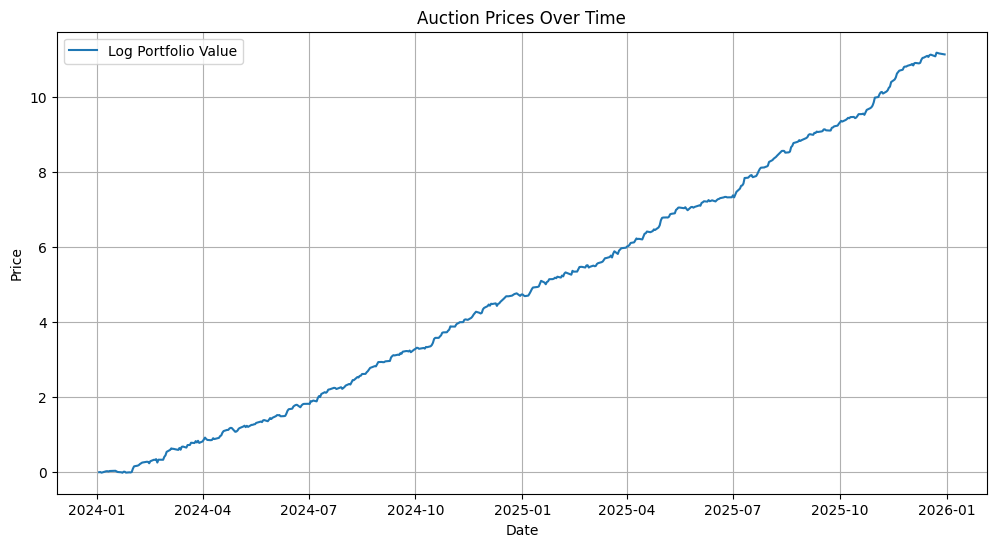

Final portfolio value: 67754.31596482664
CAGR:                 26512.88%
Annual Sharpe ratio:  9.82

Daily Allocations:
          Date  w_TEC  w_MKT  w_DATAFC  w_DATAFO  w_CASH
482 2025-12-01    0.0    0.0      -1.0       2.0     0.0
483 2025-12-02    0.0    0.0       2.0      -1.0     0.0
484 2025-12-03    0.0    0.0       2.0      -1.0     0.0
485 2025-12-04    0.0    0.0       2.0      -1.0     0.0
486 2025-12-05    0.0    0.0      -1.0       2.0     0.0
487 2025-12-08    0.0    0.0       2.0      -1.0     0.0
488 2025-12-09    0.0    0.0       2.0      -1.0     0.0
489 2025-12-10    0.0    0.0       2.0      -1.0     0.0
490 2025-12-11    0.0    0.0      -1.0       2.0     0.0
491 2025-12-12    0.0    0.0       2.0      -1.0     0.0
492 2025-12-15    0.0    0.0       2.0      -1.0     0.0
493 2025-12-16    0.0    0.0      -1.0       2.0     0.0
494 2025-12-17    0.0    0.0      -1.0       2.0     0.0
495 2025-12-18    0.0    0.0       2.0      -1.0     0.0
496 2025-12-22    0.0    

In [19]:
# Run grading
final_val, cagr_val, sharpe_val, allocations_df, pf_df = grade_submission(example_strategy, auction_prices)

print("Final portfolio value:", final_val)
print("CAGR:                ", f"{cagr_val:.2%}")
print("Annual Sharpe ratio: ", f"{sharpe_val:.2f}")
print("\nDaily Allocations:")
print(allocations_df.tail(20))
print(pf_df.tail(20))
